# List 8

In [28]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('../datasets/adult.data.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## labels

In [7]:
df.loc[df[14] == ' <=50K', 14] = 0
df.loc[df[14] == ' >50K', 14] = 1

In [8]:
df.loc[df[9] == ' Female', 9] = 0
df.loc[df[9] == ' Male', 9] = 1

In [9]:
cities = df[13].unique()
cities

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
pos = 0
for v in cities:
    df.loc[df[13] == v, 13] = pos
    pos += 1

In [11]:
colors = df[8].unique()
colors

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [12]:
pos = 0
for v in colors:
    df.loc[df[8] == v, 8] = pos
    pos += 1

In [13]:
fam = df[7].unique()
fam

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [14]:
pos = 0
for v in fam:
    df.loc[df[7] == v, 7] = pos
    pos += 1

In [15]:
prof = df[6].unique()
prof

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
pos = 0
for v in prof:
    df.loc[df[6] == v, 6] = pos
    pos += 1

In [17]:
states = df[5].unique()
states

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [18]:
pos = 0
for v in states:
    df.loc[df[5] == v, 5] = pos
    pos += 1

In [19]:
degrees = df[3].unique()
degrees

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [20]:
pos = 0
for v in degrees:
    df.loc[df[3] == v, 3] = pos
    pos += 1

In [21]:
types = df[1].unique()
types

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [22]:
pos = 0
for v in types:
    df.loc[df[1] == v, 1] = pos
    pos += 1

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,0,77516,0,13,0,0,0,0,1,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,1,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,1,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,1,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


In [33]:
X = np.array(df.values[:, 0:13])
X.shape

(32561, 13)

In [36]:
y = np.array(df[14])
y.shape

(32561,)

# Folds

In [29]:
n_splits = 5
skfold = StratifiedKFold(n_splits=n_splits)

accs = []
def show_accs(X, y, model, skfold=skfold):
    accs = 0.0
    for idx_train, idx_test in skfold.split(X, y):
        Xtrain = X[idx_train]
        Xtest = X[idx_test]
        y_train = y[idx_train]
        y_test = y[idx_test]
        
        scaler = StandardScaler().fit(Xtrain)
        Xtrain_transf = scaler.transform(Xtrain)
        Xtest_transf = scaler.transform(Xtest)
        
        model.fit(Xtrain_transf, y_train)
        y_pred = model.predict(Xtest_transf)
        
        accs += metrics.accuracy_score(y_test, y_pred)
    print (accs/n_splits)
    return (accs/n_splits)

##  Logistic Regression, kNN, Naive Bayes, SVM.

In [41]:
lr_model = linear_model.LogisticRegression()
knn_model = neighbors.KNeighborsClassifier()
nb_model = naive_bayes.GaussianNB()
svm_model = svm.SVC()

In [38]:
accs.append(show_accs(X, y, lr_model))

/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.8255275689407424


In [39]:
accs.append(show_accs(X,y,knn_model))

/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.8294586078268713


In [40]:
accs.append(show_accs(X, y, nb_model))

0.807131295903751


/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
accs.append(show_accs(X, y, svm_model))

/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.848131392667321


In [43]:
naccs = np.array(accs)
naccs

array([0.82552757, 0.82945861, 0.8071313 , 0.84813139])

([<matplotlib.axis.XTick at 0x7f23a9bdc4a8>,
 <a list of 4 Text xticklabel objects>)

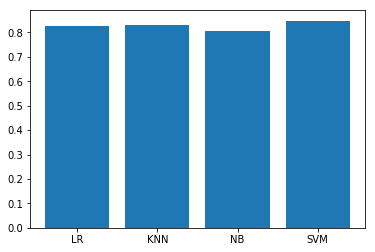

In [44]:
class_names = np.array(['LR','KNN','NB','SVM'])
plt.bar(range(len(naccs)), naccs)
plt.xticks(range(len(naccs)), class_names)

## Modelo Final

In [45]:
svm = svm.SVC()

In [49]:
scaler = StandardScaler().fit(X)

/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
X_tf = scaler.transform(X)

/home/unknown/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)